In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ETL import data_cleaning
import requests
from io import StringIO
from IPython.display import Image

In [2]:
url = 'https://jan-python-23-capstone-team3.s3.us-west-1.amazonaws.com/Global_Earthquake_Data.csv'
headers = {'SignatureHeader': 'XYZ', 'Content-type': 'application/json'}
r = requests.get(url=url, headers=headers)
print(r.status_code)


200


In [3]:
csv_string_io = StringIO(r.text)
df = pd.read_csv(csv_string_io)


In [4]:
df_cleaned = data_cleaning(df)


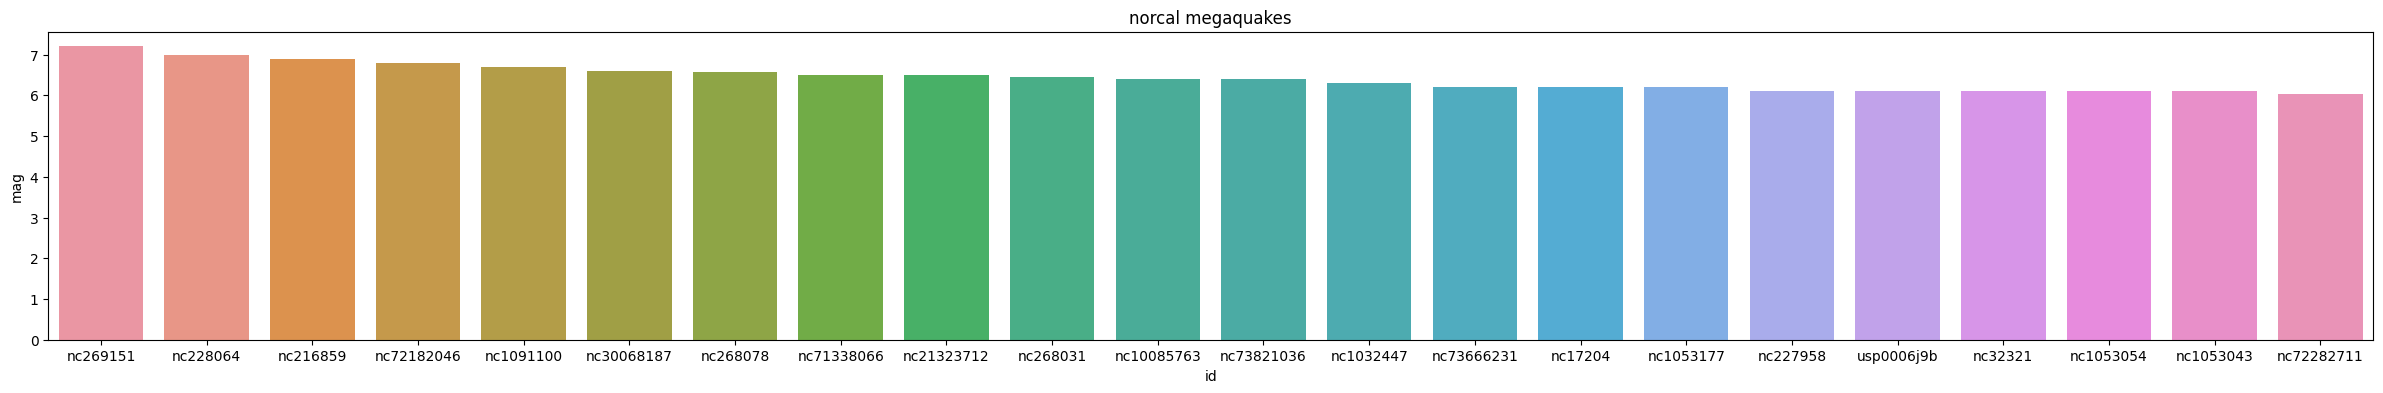

In [5]:
nor_cal = df_cleaned[(df_cleaned['locationsource'] == 'nc')]
nor_cal_more = nor_cal[nor_cal['mag'] > 6.0].sort_values('mag', ascending=False)
plt.figure(figsize=(30,4))
sns.barplot(data=nor_cal_more,x='id', y='mag')
plt.title('norcal megaquakes')
plt.show()

In [122]:
home_town = df_cleaned[(df_cleaned['event_time'].between('2014-08-23', '2014-08-25')) & (df_cleaned['mag'] == 6.02)]
home_town

,event_time,latitude,longitude,depth,mag,magtype,nst,gap,dmin,rms,net,id,updated,type,horizontalerror,deptherror,magerror,magnst,locationsource,magsource
62857,2014-08-24 10:20:44.070,38.215167,-122.312333,11.12,6.02,mw,369,28.0,0.03604,0.18,nc,nc72282711,2022-05-03 18:17:55.653,earthquake,0.11,0.15,NaN,369,nc,nc


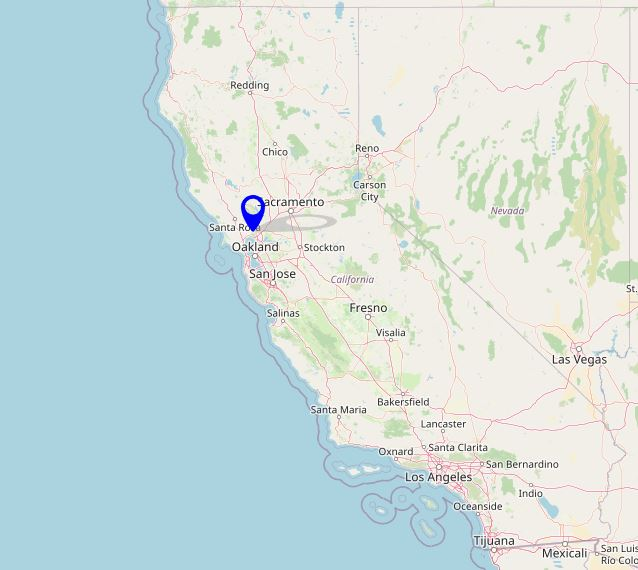

In [103]:
Image(filename='images/my own earthquake.JPG')

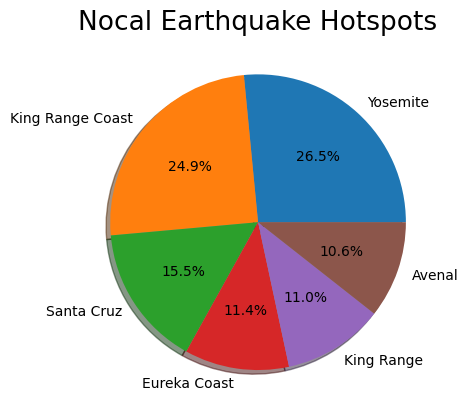

In [125]:
pd.set_option('display.max_rows', 5)
nor_cal = nor_cal.round({'latitude': 0, 'longitude': 0})
nor_cal_grouped = nor_cal.groupby(['latitude', 'longitude'])[['mag']].count().sort_values('mag', ascending=False)
nor_cal_grouped_more_than_10 = nor_cal_grouped[nor_cal_grouped['mag'] > 20]
plt.pie(nor_cal_grouped_more_than_10['mag'], labels=['Yosemite', 'King Range Coast', 'Santa Cruz', 'Eureka Coast', 'King Range', 'Avenal'], shadow=True, autopct='%1.1f%%')
plt.title('Nocal Earthquake Hotspots', fontsize=19)
plt.show()

In [6]:
japan_only = df_cleaned[(df_cleaned['latitude'].between(32.0, 45.0)) & (df_cleaned['longitude'].between(128.0, 144.0))] 
japan_only_grouped = japan_only.round({'latitude': 0, 'longitude': 0})
japan_only_grouped.groupby(['latitude', 'longitude'])[['magsource']].count().sort_values('magsource', ascending=False)

magsource
latitude longitude           
37.0     142.0            715
36.0     141.0            705
37.0     141.0            702
38.0     142.0            642
36.0     142.0            610
...                       ...
40.0     132.0              1
41.0     133.0              1
         135.0              1
         137.0              1
45.0     144.0              1

[185 rows x 1 columns]

In [127]:
#highest earthquake belongs to the Tōhoku earthquake in 2011
japan_only.sort_values('mag', ascending=False)

,event_time,latitude,longitude,depth,mag,magtype,nst,gap,dmin,rms,net,id,updated,type,horizontalerror,deptherror,magerror,magnst,locationsource,magsource
90927,2011-03-11 05:46:24.120,38.297,142.373,29.0,9.1,mww,541,9.5,NaN,1.16,official,official20110311054624120_30,2022-11-10 01:14:56.446,earthquake,NaN,NaN,NaN,541,us,official
276135,1946-12-20 19:19:10.650,33.123,135.905,15.0,8.3,mw,0,NaN,NaN,NaN,iscgem,iscgem898698,2022-04-26 18:58:40.211,earthquake,NaN,3.8,0.3,0,iscgem,iscgem
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150636,2001-12-07 19:07:41.230,35.528,139.046,60.2,4.5,mb,26,NaN,NaN,1.06,us,usp000au68,2014-11-07 01:14:26.789,earthquake,NaN,12.8,NaN,26,us,us
187626,1993-08-15 09:18:14.320,41.956,139.589,33.0,4.5,mb,0,NaN,NaN,0.60,us,usp0005yk5,2014-11-07 00:53:44.331,earthquake,NaN,NaN,NaN,0,us,us


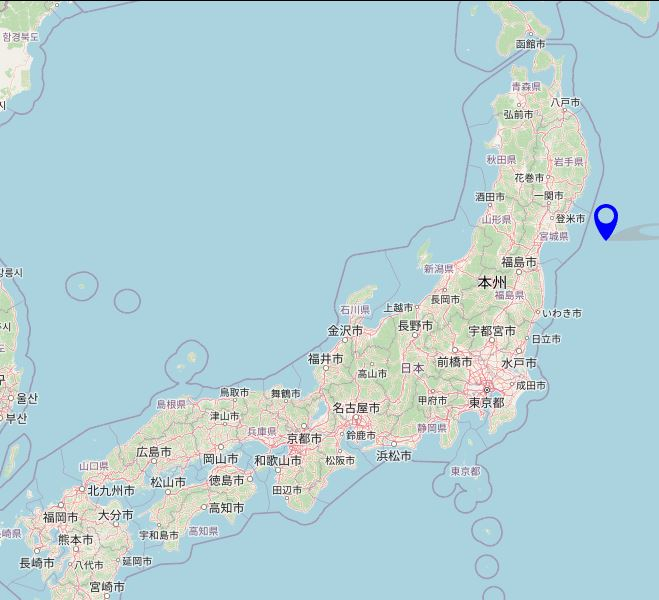

In [104]:
Image(filename='images/Tohoku earthquake.JPG')

In [134]:
pd.set_option('display.max_rows', 10)

In [135]:
japan_only_year = japan_only.groupby(japan_only['event_time'].map(lambda x: x.year))[['mag']].count().sort_values('mag', ascending=False).head(10)
japan_only_year

,mag
event_time,
2011,2992
2012,654
2000,457
2016,421
2013,363
2014,361
1983,295
2022,292
1982,267


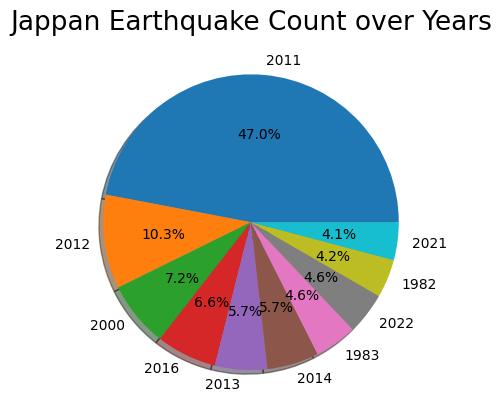

In [137]:
plt.pie(japan_only_year['mag'], labels=['2011', '2012', '2000', '2016', '2013', '2014', '1983', '2022', '1982', '2021'], shadow=True, autopct='%1.1f%%')
plt.title('Jappan Earthquake Count over Years', fontsize=19)
plt.show()